In [39]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('HousingData.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.shape

(506, 14)

# Data Perprocessing

In [10]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
def removeNUllValues(columnName, dataSet):
    meanVal = dataSet[columnName].mean()
    dataSet[columnName].fillna(value=meanVal, inplace=True)

removeNUllValues('CRIM', df)
removeNUllValues('ZN', df)
removeNUllValues('INDUS', df)
removeNUllValues('CHAS', df)
removeNUllValues('AGE', df)
removeNUllValues('LSTAT', df)

In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Data Visualisation

<AxesSubplot:>

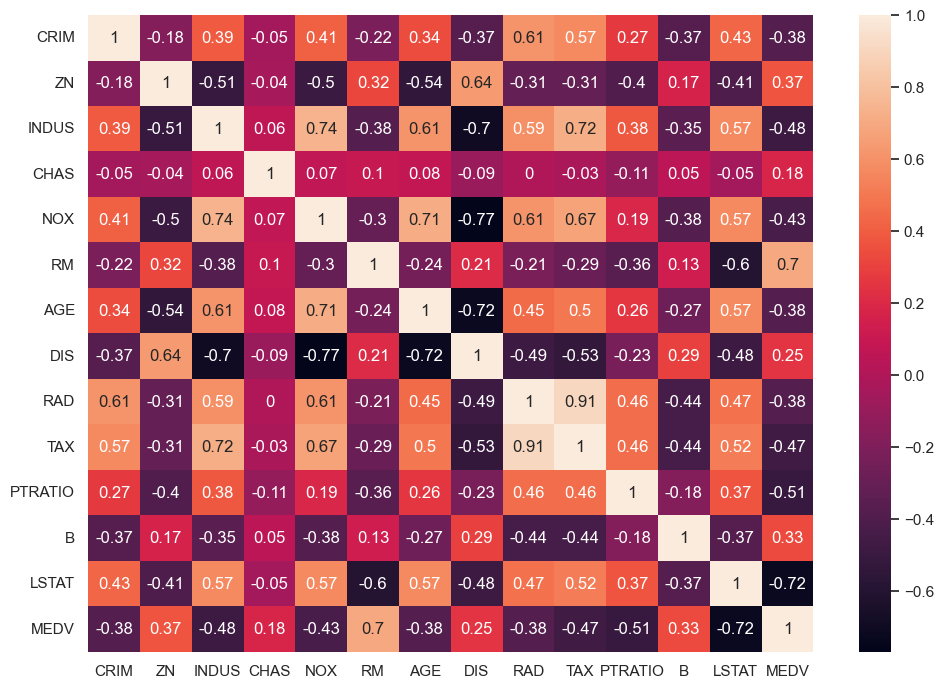

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

d:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


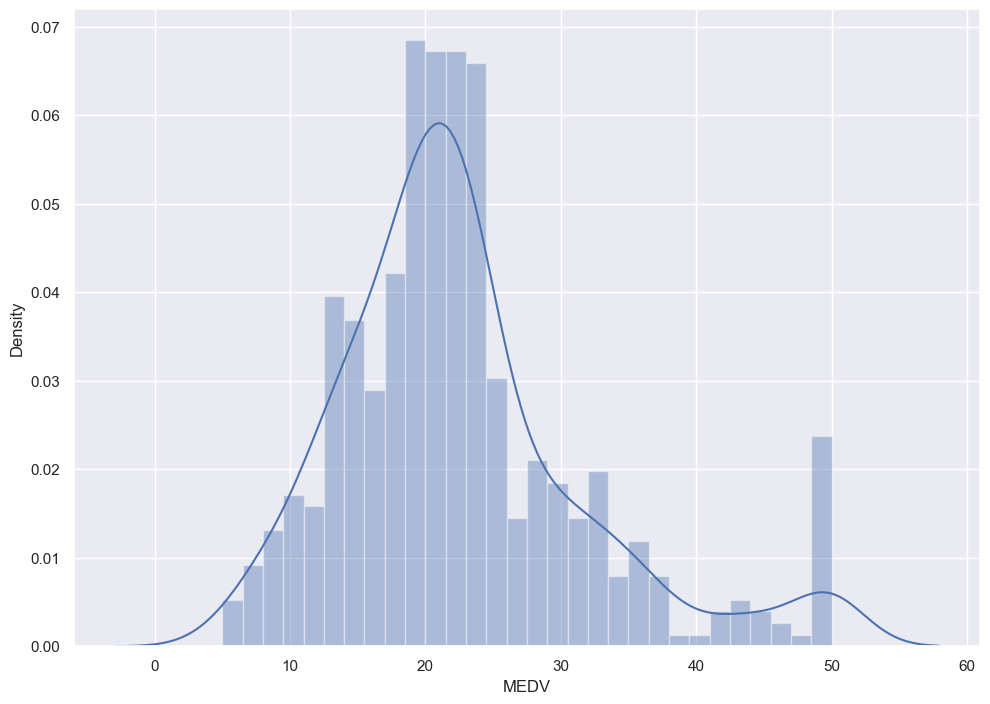

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

# Preprocessing

In [21]:
x = df.drop('MEDV', axis=1)
y = df['MEDV']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=101, shuffle=True)

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

# Model Creation

In [27]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu', input_shape=(X_train.shape[1],), name='Dense_1'),
    tf.keras.layers.Dense(units=100, activation='relu', name='Dense_2'),
    tf.keras.layers.Dense(units=1, name='Prediction'),
])

In [28]:
model.compile(
    loss = tf.keras.losses.mean_squared_error,
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
    metrics = ['mse']
)

In [29]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/50
12/12 [==============================] - 1s 27ms/step - loss: 245.2147 - mse: 245.2147 - val_loss: 78.9288 - val_mse: 78.9288
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 36.4120 - mse: 36.4120 - val_loss: 52.4589 - val_mse: 52.4589
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 28.1362 - mse: 28.1362 - val_loss: 39.1211 - val_mse: 39.1211
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 22.8415 - mse: 22.8415 - val_loss: 36.2002 - val_mse: 36.2002
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 21.0488 - mse: 21.0488 - val_loss: 40.8138 - val_mse: 40.8138
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 20.1740 - mse: 20.1740 - val_loss: 54.2932 - val_mse: 54.2932
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 21.2473 - mse: 21.2473 - val_loss: 30.0025 - val_mse: 30.0025
Epoch 8/50
12/12 [==============================] - 0s 6ms/

# Model Evaluation

In [30]:
X_train.mean(), y_train.mean()

(1.582586493164065e-17, 21.976836158192082)

In [35]:
print("Evaluation on Test Data: ")
loss, mse = model.evaluate(X_test, y_test, batch_size=32)
print(f"\nModel Loss: {loss}")
print(f"Model MSE: {(mse):.2f}")

Evaluation on Test Data: 
5/5 [==============================] - 0s 2ms/step - loss: 19.0920 - mse: 19.0920

Model Loss: 19.091978073120117
Model MSE: 19.09


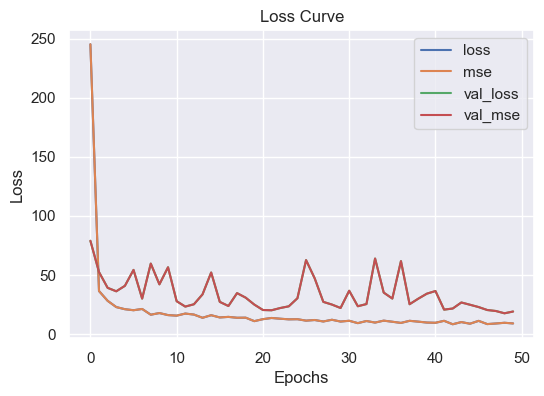

In [36]:
pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title="Loss Curve")
plt.show()

# Model Prediction

In [37]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [38]:
y_pred

array([[42.132534 ],
       [27.87565  ],
       [15.052241 ],
       [14.954595 ],
       [26.818975 ],
       [30.946928 ],
       [45.152187 ],
       [13.339133 ],
       [36.61916  ],
       [ 9.654691 ],
       [23.69945  ],
       [15.43782  ],
       [18.832312 ],
       [22.733767 ],
       [25.14396  ],
       [25.518755 ],
       [13.172851 ],
       [31.102974 ],
       [28.202791 ],
       [21.392557 ],
       [14.437854 ],
       [21.812008 ],
       [20.532019 ],
       [28.442648 ],
       [33.69566  ],
       [17.827969 ],
       [26.977465 ],
       [19.68361  ],
       [33.717724 ],
       [34.31709  ],
       [21.388765 ],
       [17.901194 ],
       [37.587543 ],
       [49.326694 ],
       [30.373531 ],
       [20.797777 ],
       [15.019693 ],
       [16.585163 ],
       [11.099405 ],
       [30.417555 ],
       [22.509636 ],
       [19.799227 ],
       [37.635567 ],
       [18.401316 ],
       [21.846708 ],
       [21.005106 ],
       [30.262995 ],
       [17.30

In [40]:
mean_absolute_error(y_test, y_pred)

3.1322427122216476

In [41]:
mean_squared_error(y_test, y_pred)

19.0919777825115

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


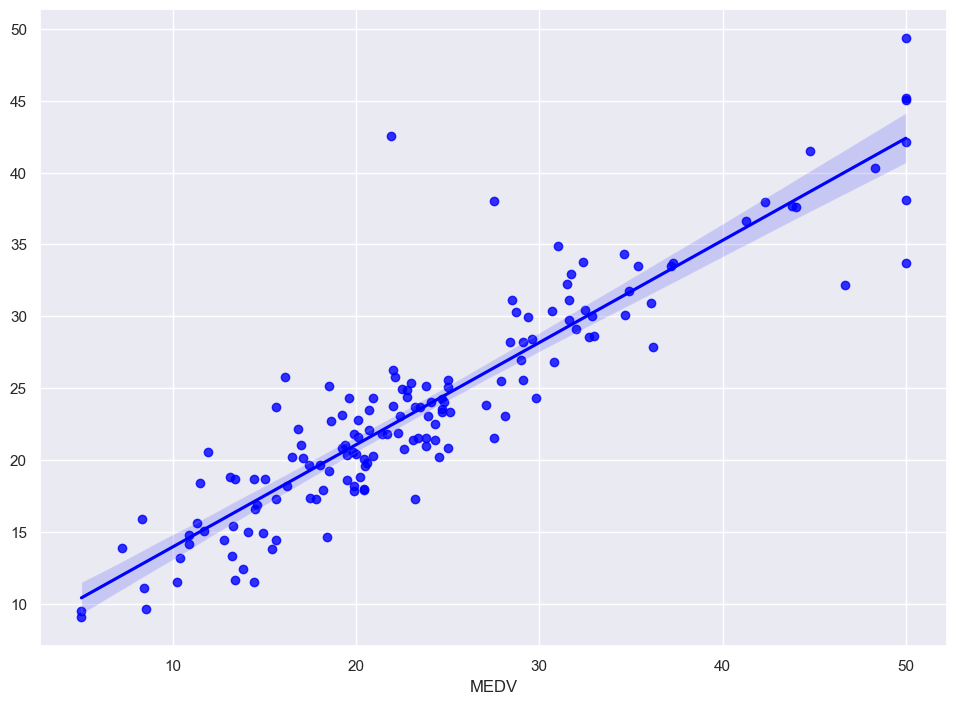

In [42]:
sns.regplot(y_test, y_pred, color='blue')
plt.show()